## Running SAM

Below, is a quickstart tutorial to analyze scRNA-seq data using SAM and visualize results. We emphasize that SAM is not meant to be a black box. All its attributes are easily accessible and can be manipulated, visualized, and saved/exported at will. For a deeper exploration of all the attributes contained within a SAM object, feel free to explore the documentation in the source code 'SAM.py'.

In [1]:
from SAM import SAM

Next, we initialize the SAM object. Here, we specify the path of the data file. If we have annotations, we can also specify their file path in 'ann_name'.

In [2]:
sam = SAM('GSE74596_data.csv.gz',ann_name='GSE74596_ann.csv')

Now, we load and filter the data. SAM expects a data table of genes as rows and cells as columns. The first row of the table should be cell identifiers and the first columns of the table should be gene identifiers.

Let's use all default parameters for now.

In [3]:
sam.load_data()

To run SAM using default parameters,

In [4]:
sam.run()

RUNNING GSE74596_data.csv.gz
Iteration: 0, Convergence: 0.9814897361952917
Iteration: 1, Convergence: 0.9442553610029759
Iteration: 2, Convergence: 0.06777848181191914
Iteration: 3, Convergence: 0.001722450683204424
Iteration: 4, Convergence: 0.00031593172990906915
Computing the t-SNE embedding...
Please run the SAM analysis first using 'run' after loading the data.
Elapsed time: 2.8573520183563232 seconds


## Visualization

To visualize the t-SNE embedding:

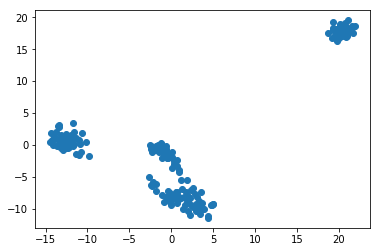

In [5]:
sam.scatter()

To visualize the t-SNE embedding with our ground truth annotations overlaid:

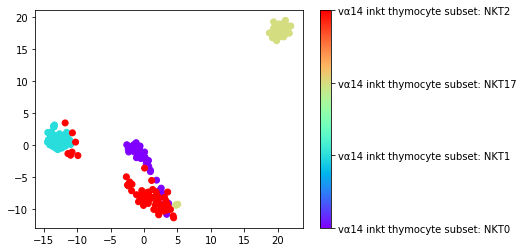

In [6]:
sam.scatter(c=sam.ann)

The ranked genes are stored in 'sam.ranked_genes'. Printing the top 10 ranked_genes,

In [ ]:
print( sam.ranked_genes[:10] )

If we want to display the gene expression pattern of the number one ranked gene, we can use the following:

In [ ]:
sam.show_gene_expression( sam.ranked_genes[0] )

To display the top 3 genes,

In [ ]:
sam.plot_top_genes(n_genes=3)

To display orthogonal (or roughly orthogonal) gene expression patterns:

In [ ]:
sam.plot_correlated_groups()

To display genes correlated with a given gene:

In [ ]:
sam.plot_correlated_genes( sam.ranked_genes[0] , n_genes=6 );

## Input/Output

To save the SAM object and all its contents into a Pickle file:

In [ ]:
sam.save('example_save',dirname = 'output_directory')

To load a saved SAM object:

In [ ]:
sam=SAM(''); #create an empty SAM object
sam.load('output_directory/example_save.p')

Individual attributes within the SAM object, such as the cell-to-cell distance matrix, the list of ranked genes, the nearest neighbor matrix, the rescaled expression matrix, etc., can be manually saved/exported using any desired method.

See below for a list of all attributes stored in SAM after running the analysis:

In [20]:
list(sam.__dict__.keys())

['filename',
 'ann_name',
 'k',
 'distance',
 'analysis_performed',
 'params',
 'dataset',
 'filtered_dataset',
 'num_expressed_genes',
 'D',
 'gene_names',
 'cell_names',
 'ann',
 'ann_int',
 'D_avg',
 'weighted_data',
 'wPCA_data',
 'pca',
 'dist',
 'indices',
 'nnm_adj',
 'weights',
 'ranked_genes',
 'dt',
 'gene_groups',
 'geneID_groups']

### After initializing the SAM object

filename: The path to the data file.

ann_name: The path to the cell annotations file (optional).

k: The number of nearest neighbors to identify for each cell when constructing the nearest neighbor graph.

distance: The distance metric used when constructing the cell-to-cell distance matrix.

### After loading the expression data

dataset: A Pandas DataFrame containing the original input data (cells x genes).

filtered_dataset: A Pandas DataFrame containing the filtered data (cells x genes).

num_expressed_genes: The number of expressed genes in each cell.

D: The numpy array version of 'filtered_dataset' (equivalent to filtered_dataset.values).

gene_names: A vector of the gene names (equivalent to filtered_dataset.columns).

cell_names: A vector of the cell names (equivalent to filtered_dataset.index).

### After loading the cell annotations

ann: A vector of cell annotations if they were provided.

ann_int: A vector of cell annotations converted to integers.

### After running the SAM algorithm

D_avg: The k-nearest-neighbor-averaged expression data.

weighted_data: The rescaled expression data.

wPCA_data: The weighted PCA matrix.

pca: The sklearn pca object.

dist: The cell-to-cell distance matrix.

indices: Indices sorting the genes according to the weights in descending order (i.e. indices[0] is the index of the gene with the largest weight).

nnm_adj: The nearest neighbor adjacency matrix.

weights: A vector of weights for each gene.

ranked_genes: The ranked list of genes, i.e. sam.gene_names[sam.indices].

dt: The t-SNE embedding.

gene_groups: A list of numpy arrays, where each element of the list contains a vector of gene indices that are correlated with each other.

geneID_groups: A list of numpy arrays, where each element of the list contains a vector of gene IDs that are correlated with each other.
